# Problem Statement

# Objective of the Case Study

# Import All The Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import The Data Set And data Understanding

In [2]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Preprocessing

## Duplicate

In [7]:
leads[leads.duplicated()==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Dropping Lead Number and Prospect ID since they have all unique values


In [8]:
leads.drop(columns=['Prospect ID','Lead Number'],inplace=True)

In [9]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Converting 'Select' values to NaN

In [10]:
leads = leads.replace('Select',np.nan)

In [11]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Missing Value

In [12]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# Missing value percentage

In [14]:
round(100*leads.isnull().sum()/len(leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

# Handling Missing Value>35%

In [15]:
# Drop all the columns with missing value greater than 35%

In [16]:
leads.columns[(100*leads.isnull().sum()/len(leads.index)) >35]

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [17]:
leads.drop(columns=['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],inplace = True)

In [18]:
round(100*leads.isnull().sum()/len(leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [19]:
leads.shape

(9240, 25)

# Handling Missing Value Between 25% to 30%

In [21]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Kuwait                     4
Germany                    4
Nigeria                    4
Canada                     4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Belgium                    2
Italy                      2
China                      2
Netherlands                2
Bangladesh                 2
Ghana                      2
Uganda                     2
Kenya                      1
Russia                     1
Switzerland                1
Liberia                    1
Sri Lanka                  1
Denmark                    1
Malaysia      

In [22]:
# Replace the NaN with 'India' which is the majority among all the country

In [23]:
leads['Country'] = leads['Country'].replace(np.nan,'India')

In [24]:
round(100*leads.isnull().sum()/len(leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [25]:
# Column "What is your current occupation"

In [26]:
leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.nan,'Unemployed')

In [28]:
# Column "What matters most to you in choosing a course"

In [29]:
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
leads["What matters most to you in choosing a course"]=leads["What matters most to you in choosing a course"].replace(np.nan,'Better Career Prospects')

In [31]:
round(100*leads.isnull().sum()/len(leads.index),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

# Missing Value < 2%

In [33]:
leads.columns[100*leads.isnull().sum()/len(leads.index)!=0]

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'], dtype='object')

In [34]:
# Column "Lead source"

In [35]:
leads[leads["Lead Source"].isnull()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
836,Lead Add Form,NaN,Yes,No,1,NaN,1378,NaN,Email Bounced,India,...,No,No,No,No,No,No,No,No,No,Modified
1569,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,No,SMS Sent
1746,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,No,Modified
2020,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,No,SMS Sent
2025,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,No,SMS Sent
2152,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,No,SMS Sent
2346,Lead Add Form,NaN,Yes,No,1,0.0,0,0.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,No,SMS Sent
2544,Lead Import,NaN,No,No,0,0.0,0,0.0,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
2601,Quick Add Form,NaN,Yes,No,1,NaN,2217,NaN,Email Bounced,India,...,No,No,No,No,No,No,No,No,No,Modified
2676,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,No,SMS Sent


In [36]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')

In [37]:
round(100*leads.isnull().sum()/len(leads.index),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [38]:
#'TotalVisits', 'Page Views Per Visit', 'Last Activity' columns

In [39]:
leads[leads["TotalVisits"].isnull()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
79,Lead Add Form,Reference,No,No,1,NaN,705,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
81,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
88,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
120,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
8107,Lead Add Form,Reference,No,No,1,NaN,903,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
8434,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
9015,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified


In [40]:
leads[leads["Page Views Per Visit"].isnull()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
79,Lead Add Form,Reference,No,No,1,NaN,705,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
81,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
88,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
120,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
8107,Lead Add Form,Reference,No,No,1,NaN,903,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
8434,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
9015,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified


In [41]:
leads[leads["Last Activity"].isnull()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
79,Lead Add Form,Reference,No,No,1,NaN,705,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
81,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
88,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
120,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
8107,Lead Add Form,Reference,No,No,1,NaN,903,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
8434,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified
9015,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,NaN,India,...,No,No,No,No,No,No,No,No,No,Modified


In [42]:
leads = leads.dropna()

In [43]:
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

# Outlier Identification And Treatment

In [44]:
leads.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                                         object
Digital Advertisement          

In [45]:
# Continuous data

In [46]:
leads.columns[leads.dtypes!='object']

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [47]:
# TotalVisits column

In [48]:
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

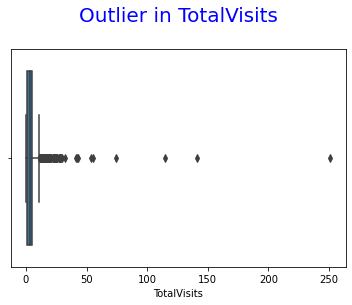

In [49]:
plt.figure(figsize=(6,4))
plt.title("Outlier in TotalVisits\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
sns.boxplot(leads['TotalVisits'])
plt.show()


In [50]:
# Total Time Spent on Website  column

In [51]:
leads['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

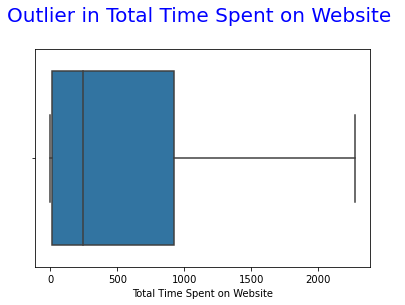

In [52]:
plt.figure(figsize=(6,4))
plt.title("Outlier in Total Time Spent on Website \n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

In [53]:
# Page Views Per Visit  column 

In [54]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

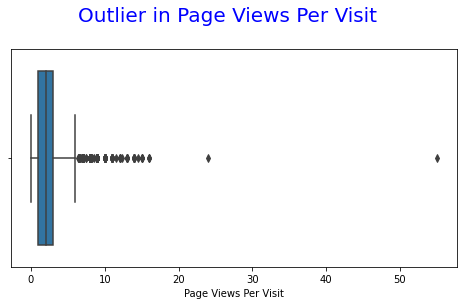

In [55]:
plt.figure(figsize=(8,4))
plt.title("Outlier in Page Views Per Visit  \n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

## Outlier Treatment

In [56]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

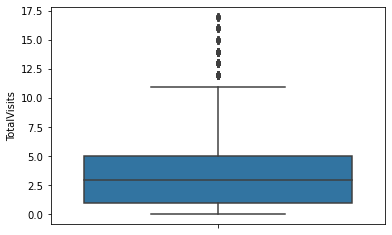

In [57]:
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()


In [58]:
leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

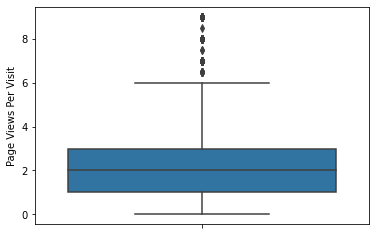

In [59]:
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()


# EDA

## Univariate Analysis

In [60]:
leads.columns[leads.dtypes=='object']

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [61]:
#'Lead Origin' column

In [62]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64

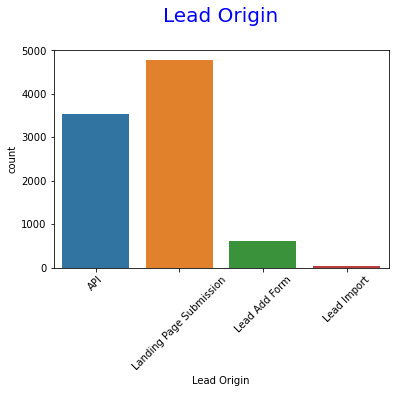

In [63]:
plt.title("Lead Origin\n",fontdict = {'fontsize':20 ,'fontweight': 5 , 'color': 'blue'})
          
sns.countplot(leads["Lead Origin"])
plt.xticks(rotation = 45)
plt.show()

In [64]:
# Lead Source column

In [65]:
leads['Lead Source'].value_counts()

Google               2836
Direct Traffic       2499
Olark Chat           1751
Organic Search       1092
Reference             442
Welingak Website      129
Referral Sites        117
Facebook               31
Others                 29
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
welearnblog_Home        1
Press_Release           1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
Name: Lead Source, dtype: int64

In [66]:
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'Others', 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [67]:
# 'Lead Source' column data adjustments

In [68]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing',
                                                     'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
                                                     'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],'Others')                                                   


In [69]:
leads['Lead Source'].value_counts()

Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                49
Social Media          33
Name: Lead Source, dtype: int64

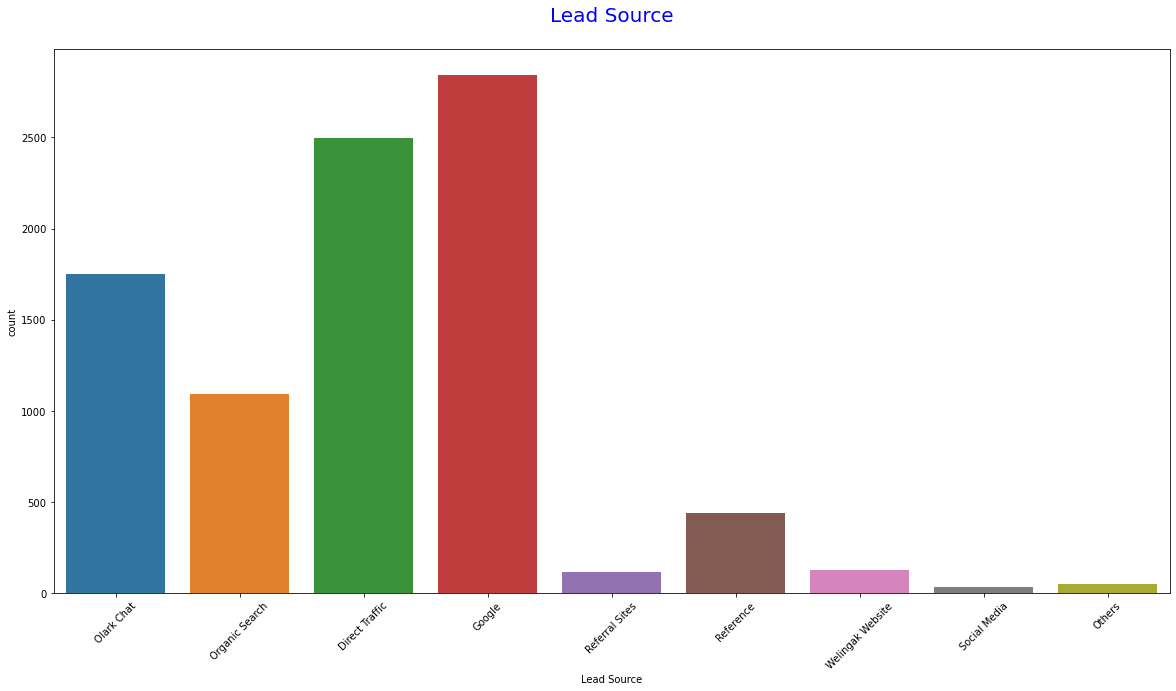

In [70]:
plt.figure(figsize=(20,10))
plt.title("Lead Source\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
sns.countplot(leads['Lead Source'])
plt.xticks(rotation=45)
plt.show()

In [71]:
#'Do Not Email'

In [72]:
leads['Do Not Email'].value_counts()

No     8256
Yes     697
Name: Do Not Email, dtype: int64

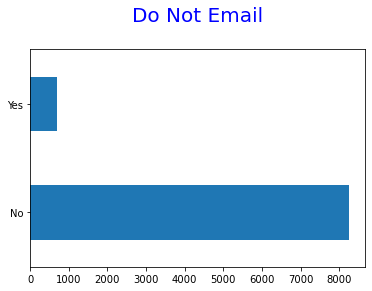

In [73]:
plt.title("Do Not Email\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Do Not Email'].value_counts().plot.barh()
plt.show()

In [74]:
#'Do Not Call'

In [75]:
leads['Do Not Call'].value_counts()

No     8951
Yes       2
Name: Do Not Call, dtype: int64

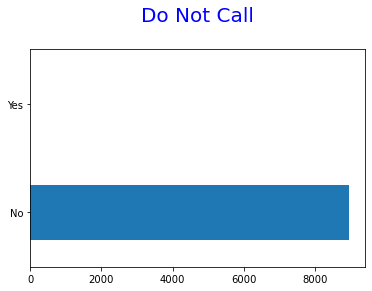

In [76]:
plt.title("Do Not Call\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Do Not Call'].value_counts().plot.barh()
plt.show()

In [77]:
#'Last Activity'

In [78]:
leads['Last Activity'].value_counts()

Email Opened                    3390
SMS Sent                        2700
Olark Chat Conversation          966
Page Visited on Website          594
Converted to Lead                428
Email Bounced                    310
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      60
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [79]:
# Adjustment in the data in 'Last Activity' column


In [80]:
leads['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [81]:
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation',
                                                         'View in browser link Clicked',
                                                         'Visited Booth in Tradeshow', 
                                                         'Approached upfront',
                                                         'Resubscribed to emails', 
                                                         'Email Received', 
                                                         'Email Marked Spam'],'Others')   

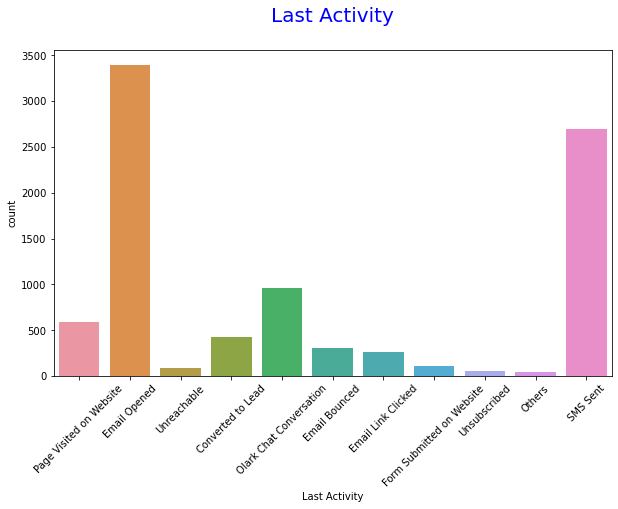

In [82]:
plt.figure(figsize=(10,6))
plt.title("Last Activity\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
sns.countplot(leads['Last Activity'])
plt.xticks(rotation=45)
plt.show()

In [83]:
# 'Country'

In [84]:
leads.Country.value_counts()

India                   8670
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
Canada                     4
South Africa               4
Kuwait                     4
Germany                    4
Nigeria                    4
unknown                    4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Belgium                    2
Italy                      2
China                      2
Bangladesh                 2
Ghana                      2
Uganda                     2
Kenya                      1
Russia                     1
Switzerland                1
Netherlands                1
Liberia                    1
Sri Lanka                  1
Denmark                    1
Malaysia      

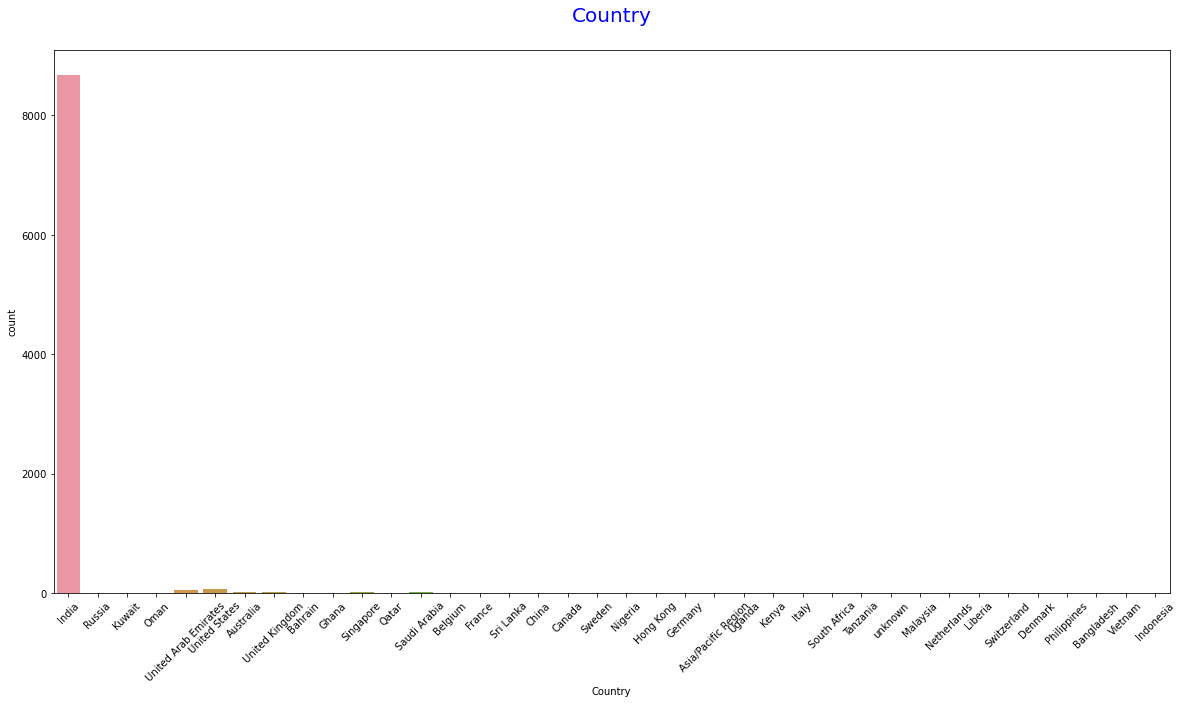

In [85]:
plt.figure(figsize=(20,10))
plt.title("Country\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
sns.countplot(leads['Country'])
plt.xticks(rotation=45)
plt.show()

In [86]:
# 'What is your current occupation'

In [87]:
leads['What is your current occupation'].value_counts()

Unemployed              8053
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

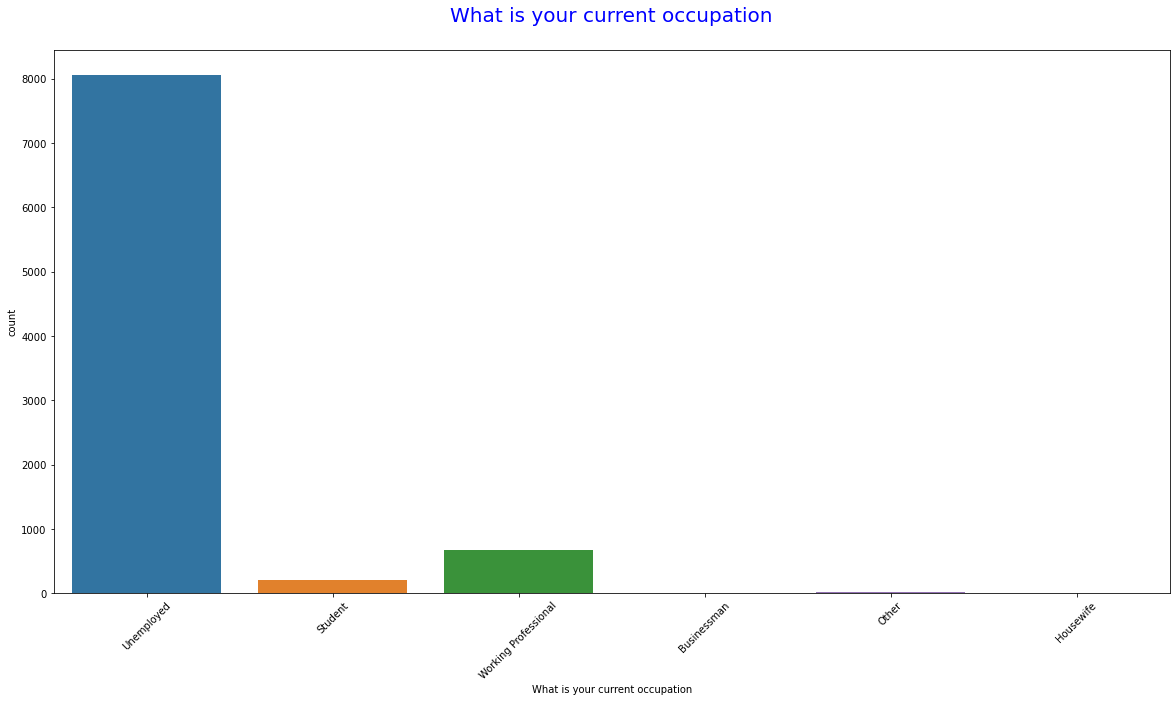

In [88]:
plt.figure(figsize=(20,10))
plt.title("What is your current occupation\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [89]:
# 'What matters most to you in choosing a course'

In [90]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      8951
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

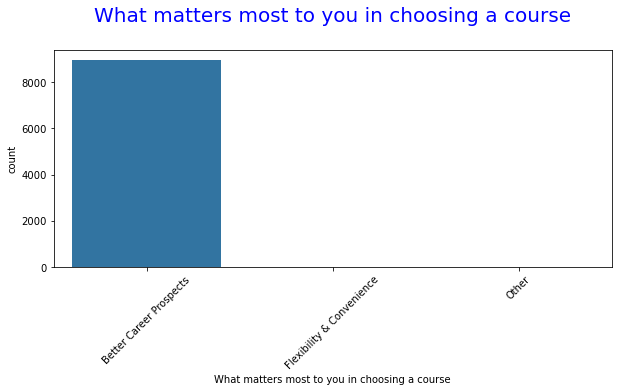

In [91]:
plt.figure(figsize=(10,4))
plt.title("What matters most to you in choosing a course\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
sns.countplot(leads['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

In [92]:
#'Search' column

In [93]:
leads['Search'].value_counts()

No     8940
Yes      13
Name: Search, dtype: int64

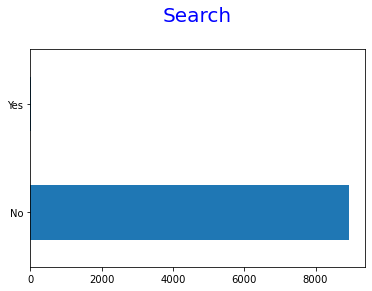

In [94]:
plt.title("Search\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Search'].value_counts().plot.barh()
plt.show()

In [95]:
# 'Magazine' column

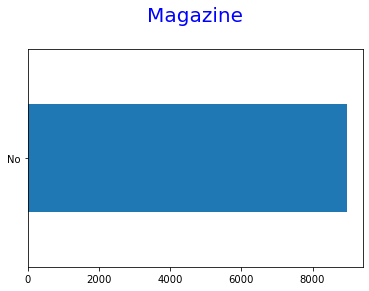

In [96]:
plt.title("Magazine\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Magazine'].value_counts().plot.barh()
plt.show()

In [97]:
leads['Magazine'].value_counts()

No    8953
Name: Magazine, dtype: int64

In [98]:
# 'Newspaper Article'columns

In [99]:
leads['Newspaper Article'].value_counts()

No     8952
Yes       1
Name: Newspaper Article, dtype: int64

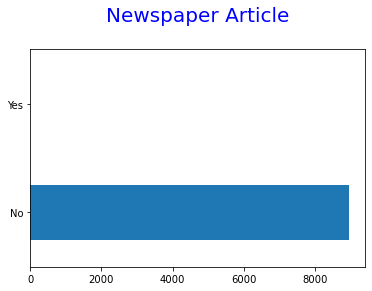

In [100]:
plt.title("Newspaper Article\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Newspaper Article'].value_counts().plot.barh()
plt.show()

In [101]:
# 'X Education Forums'

In [102]:
leads['X Education Forums'].value_counts()

No    8953
Name: X Education Forums, dtype: int64

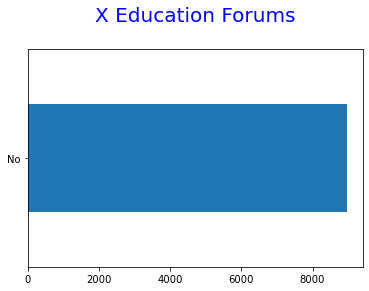

In [103]:
plt.title("X Education Forums\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['X Education Forums'].value_counts().plot.barh()
plt.show()

In [104]:
# 'Newspaper'

In [105]:
leads['Newspaper'].value_counts()

No     8952
Yes       1
Name: Newspaper, dtype: int64

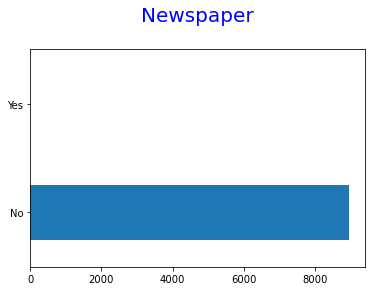

In [106]:
plt.title("Newspaper\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Newspaper'].value_counts().plot.barh()
plt.show()

In [107]:
# 'Digital Advertisement'

In [108]:
leads['Digital Advertisement'].value_counts()

No     8950
Yes       3
Name: Digital Advertisement, dtype: int64

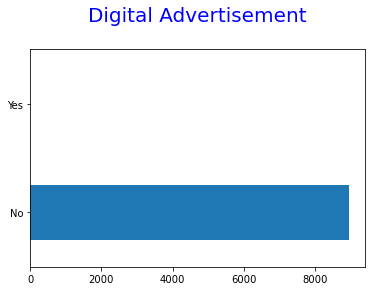

In [109]:
plt.title("Digital Advertisement\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Digital Advertisement'].value_counts().plot.barh()
plt.show()

In [110]:
#'Through Recommendations'

In [111]:
leads['Through Recommendations'].value_counts()

No     8947
Yes       6
Name: Through Recommendations, dtype: int64

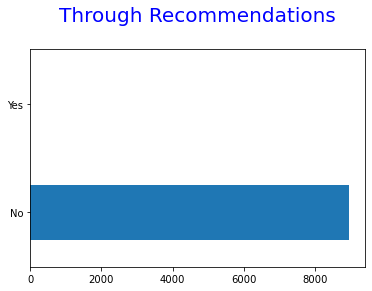

In [112]:
plt.title("Through Recommendations\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Through Recommendations'].value_counts().plot.barh()
plt.show()

In [113]:
# 'Receive More Updates About Our Courses'

In [114]:
leads['Receive More Updates About Our Courses'].value_counts()

No    8953
Name: Receive More Updates About Our Courses, dtype: int64

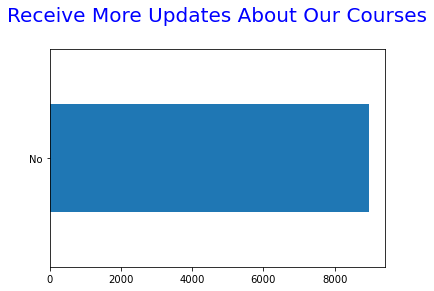

In [115]:
plt.title("Receive More Updates About Our Courses\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Receive More Updates About Our Courses'].value_counts().plot.barh()
plt.show()

In [116]:
# 'Update me on Supply Chain Content'

In [117]:
leads['Update me on Supply Chain Content'].value_counts()

No    8953
Name: Update me on Supply Chain Content, dtype: int64

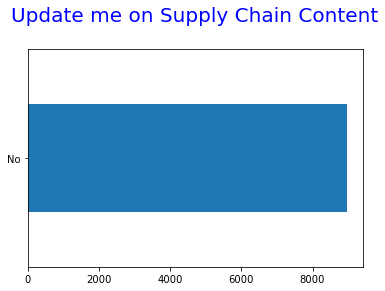

In [118]:
plt.title("Update me on Supply Chain Content\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Update me on Supply Chain Content'].value_counts().plot.barh()
plt.show()

In [119]:
#'Get updates on DM Content'

In [120]:
leads['Get updates on DM Content'].value_counts()

No    8953
Name: Get updates on DM Content, dtype: int64

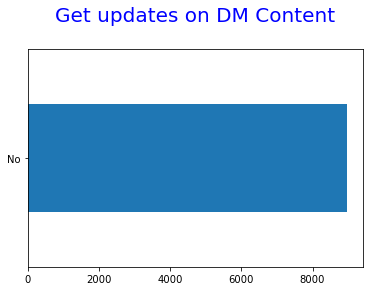

In [121]:
plt.title("Get updates on DM Content\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['Get updates on DM Content'].value_counts().plot.barh()
plt.show()

In [122]:
# 'I agree to pay the amount through cheque'

In [123]:
leads['I agree to pay the amount through cheque'].value_counts()

No    8953
Name: I agree to pay the amount through cheque, dtype: int64

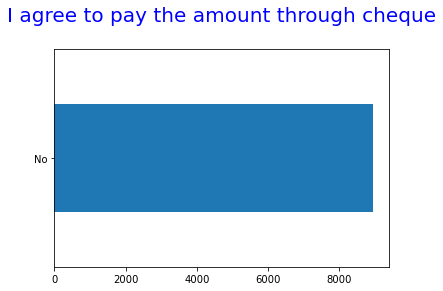

In [124]:
plt.title("I agree to pay the amount through cheque\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
leads['I agree to pay the amount through cheque'].value_counts().plot.barh()
plt.show()

In [125]:
# 'A free copy of Mastering The Interview'

In [126]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6155
Yes    2798
Name: A free copy of Mastering The Interview, dtype: int64

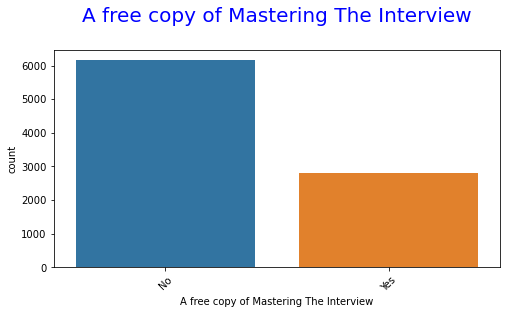

In [127]:
plt.figure(figsize=(8,4))
plt.title("A free copy of Mastering The Interview\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.xticks(rotation=45)
plt.show()

In [128]:
# 'Last Notable Activity'

In [129]:
leads['Last Notable Activity'].value_counts()

Modified                        3224
Email Opened                    2789
SMS Sent                        2143
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Resubscribed to emails             1
Approached upfront                 1
Form Submitted on Website          1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [130]:
# Handling the imbalance in data set in Last Notable Activity columns

In [131]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other')


In [132]:
leads['Last Notable Activity'].value_counts()

Modified                   3224
Email Opened               2789
SMS Sent                   2143
Page Visited on Website     288
Olark Chat Conversation     182
Email Link Clicked          170
Email Bounced                59
Unsubscribed                 46
Unreachable                  32
Other                        20
Name: Last Notable Activity, dtype: int64

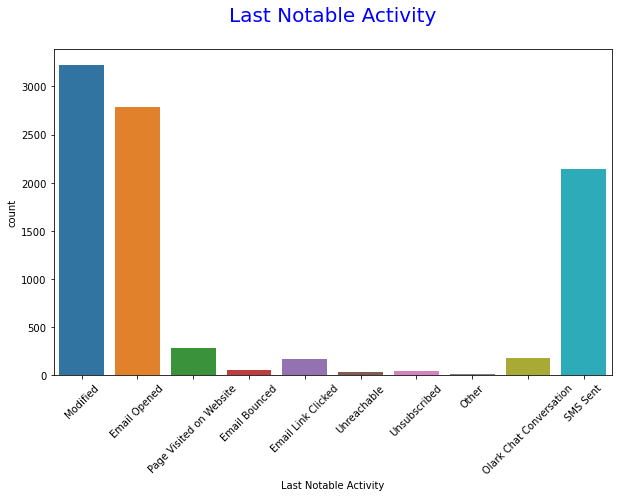

In [133]:
plt.figure(figsize=(10,6))
plt.title("Last Notable Activity\n",fontdict={'fontsize':20,'fontweight':10,'color':'blue'})
sns.countplot(leads['Last Notable Activity'])
plt.xticks(rotation=45)
plt.show()

### Dropping highly imbalance columns

In [134]:
leads.drop(columns=['Country','Do Not Call','What matters most to you in choosing a course',
                    'Search', 'Magazine','Newspaper Article', 'X Education Forums', 
                    'Newspaper','Digital Advertisement', 'Through Recommendations',
                    'Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content', 'Get updates on DM Content',
                    'I agree to pay the amount through cheque'],inplace=True)

In [135]:
leads.shape

(8953, 11)

In [136]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


## Bivariate Analysis

In [137]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Numerical- Categorical analysis

In [138]:
# 'TotalVisits' and 'Converted'

In [139]:
leads.groupby(['Converted'])['TotalVisits'].mean()

Converted
0    3.042461
1    3.307806
Name: TotalVisits, dtype: float64

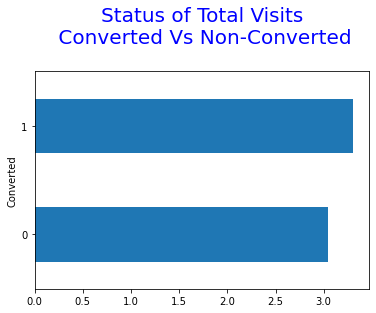

In [140]:
plt.title("Status of Total Visits\n Converted Vs Non-Converted\n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
leads.groupby(['Converted'])['TotalVisits'].mean().plot.barh()
plt.show() 


In [141]:
# 'Total Time Spent on Website' and 'Converted'

In [142]:
leads.groupby(['Converted'])['Total Time Spent on Website'].mean()

Converted
0    327.822958
1    723.161708
Name: Total Time Spent on Website, dtype: float64

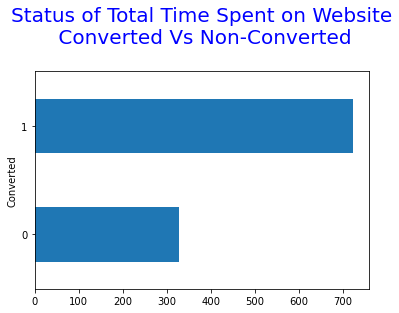

In [143]:
plt.title("Status of Total Time Spent on Website\n Converted Vs Non-Converted\n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
leads.groupby(['Converted'])['Total Time Spent on Website'].mean().plot.barh()
plt.show() 

In [144]:
# 'Page Views Per Visit' and 'Converted'

In [145]:
leads.groupby(['Converted'])['Page Views Per Visit'].mean()

Converted
0    2.275934
1    2.252000
Name: Page Views Per Visit, dtype: float64

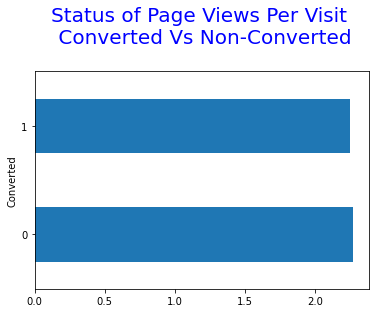

In [146]:
plt.title("Status of Page Views Per Visit \n Converted Vs Non-Converted\n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
leads.groupby(['Converted'])['Page Views Per Visit'].mean().plot.barh()
plt.show() 

### Categorical - Categorical analysis

In [147]:
# 'Lead Origin' and 'Converted'

In [148]:
leads.groupby(['Lead Origin'])['Converted'].sum()

Lead Origin
API                        1100
Landing Page Submission    1718
Lead Add Form               568
Lead Import                   9
Name: Converted, dtype: int64

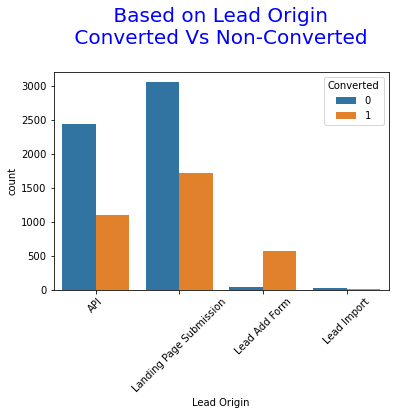

In [149]:
plt.title(" Based on Lead Origin \n Converted Vs Non-Converted \n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
sns.countplot(leads["Lead Origin"],hue= leads["Converted"])
plt.xticks(rotation=45)
plt.show()

In [150]:
#'Lead Source' and 'Converted'

In [151]:
leads.groupby(['Lead Source'])['Converted'].sum()

Lead Source
Direct Traffic       805
Google              1132
Olark Chat           447
Organic Search       402
Others                34
Reference            409
Referral Sites        29
Social Media          10
Welingak Website     127
Name: Converted, dtype: int64

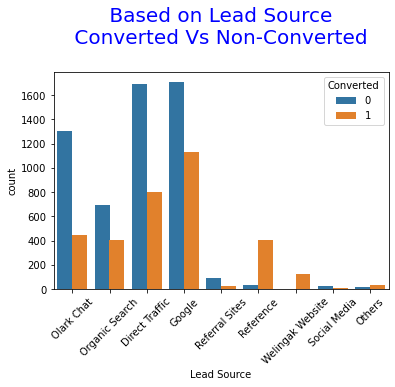

In [152]:
plt.title(" Based on Lead Source \n Converted Vs Non-Converted \n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
sns.countplot(leads["Lead Source"],hue= leads["Converted"])
plt.xticks(rotation=45)
plt.show()

In [153]:
#'Do Not Email' and 'Converted'

In [154]:
leads.groupby(['Do Not Email'])['Converted'].sum()

Do Not Email
No     3287
Yes     108
Name: Converted, dtype: int64

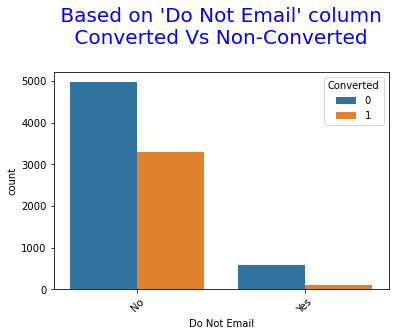

In [155]:
plt.title(" Based on 'Do Not Email' column \n Converted Vs Non-Converted \n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
sns.countplot(leads["Do Not Email"],hue= leads["Converted"])
plt.xticks(rotation=45)
plt.show()

In [156]:
#'Last Activity' and 'Converted'

In [157]:
leads.groupby(['Last Activity'])['Converted'].sum()

Last Activity
Converted to Lead              54
Email Bounced                  16
Email Link Clicked             72
Email Opened                 1227
Form Submitted on Website      27
Olark Chat Conversation        81
Others                         29
Page Visited on Website       141
SMS Sent                     1704
Unreachable                    29
Unsubscribed                   15
Name: Converted, dtype: int64

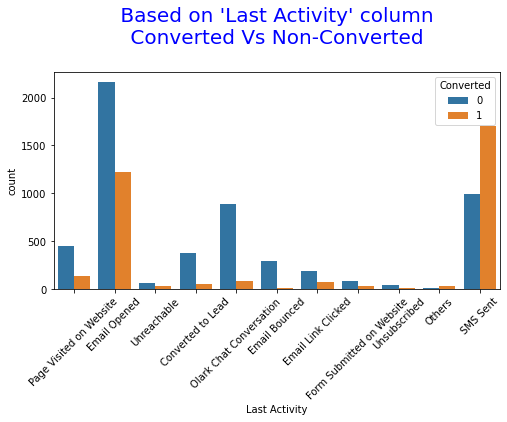

In [158]:
plt.figure(figsize=(8,4))
plt.title(" Based on 'Last Activity' column \n Converted Vs Non-Converted \n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
sns.countplot(leads["Last Activity"],hue= leads["Converted"])
plt.xticks(rotation=45)
plt.show()

In [159]:
#'What is your current occupation' and 'Converted'

In [160]:
leads.groupby(['What is your current occupation'])['Converted'].sum()

What is your current occupation
Businessman                4
Housewife                  9
Other                      7
Student                   72
Unemployed              2691
Working Professional     612
Name: Converted, dtype: int64

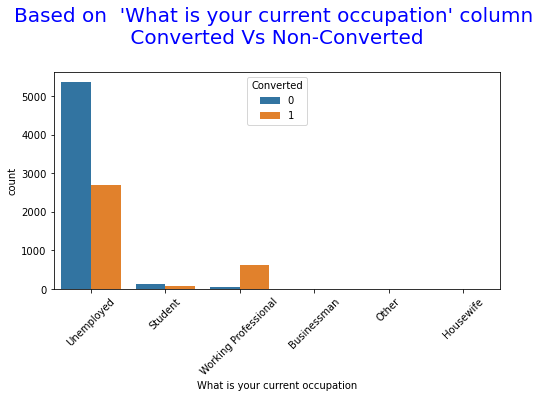

In [161]:
plt.figure(figsize=(8,4))
plt.title("Based on  'What is your current occupation' column \n Converted Vs Non-Converted \n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
sns.countplot(leads["What is your current occupation"],hue= leads["Converted"])
plt.xticks(rotation=45)
plt.show()

In [162]:
#'A free copy of Mastering The Interview' and 'Converted'

In [163]:
leads.groupby(['A free copy of Mastering The Interview'])['Converted'].sum()

A free copy of Mastering The Interview
No     2405
Yes     990
Name: Converted, dtype: int64

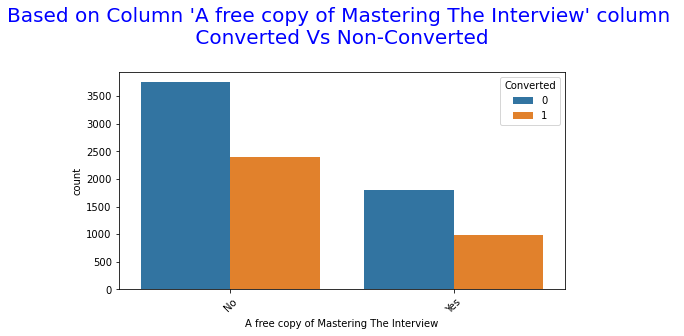

In [164]:
plt.figure(figsize=(8,4))
plt.title("Based on Column 'A free copy of Mastering The Interview' column \n Converted Vs Non-Converted \n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
sns.countplot(leads["A free copy of Mastering The Interview"],hue= leads["Converted"])
plt.xticks(rotation=45)
plt.show()

In [165]:
#'Last Notable Activity' and 'Converted'

In [166]:
leads.groupby(['Last Notable Activity'])['Converted'].sum()

Last Notable Activity
Email Bounced                 9
Email Link Clicked           44
Email Opened               1022
Modified                    671
Olark Chat Conversation      24
Other                        17
Page Visited on Website      84
SMS Sent                   1489
Unreachable                  22
Unsubscribed                 13
Name: Converted, dtype: int64

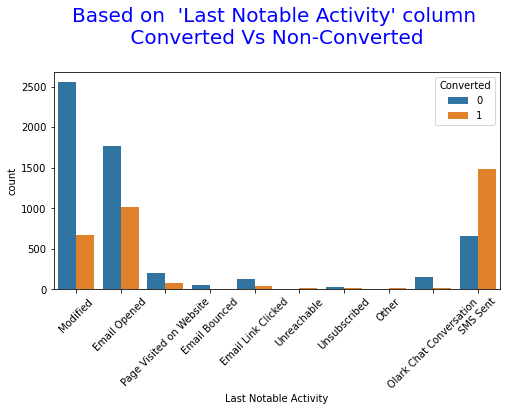

In [167]:
plt.figure(figsize=(8,4))
plt.title("Based on  'Last Notable Activity' column \n Converted Vs Non-Converted \n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
sns.countplot(leads["Last Notable Activity"],hue= leads["Converted"])
plt.xticks(rotation=45)
plt.show()

### Numerical- Numerical analysis

In [168]:
# 'TotalVisits' and 'Total Time Spent on Website'

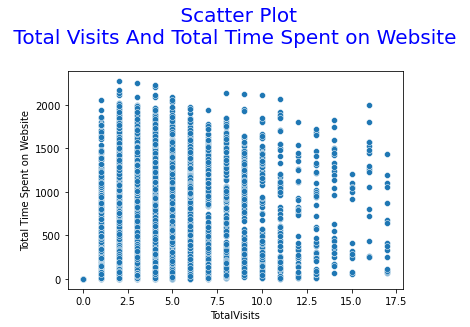

In [169]:
plt.title(" Scatter Plot\n Total Visits And Total Time Spent on Website \n",fontdict = {'fontsize':20 ,'fontweight': 5 , 'color': 'blue'})

sns.scatterplot(leads['TotalVisits'],leads['Total Time Spent on Website'])
plt.show()

In [170]:
# 'TotalVisits' and 'Page Views Per Visit'

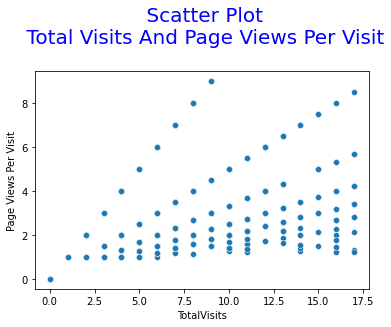

In [171]:
plt.title(" Scatter Plot\n Total Visits And Page Views Per Visit\n",fontdict = {'fontsize':20 ,'fontweight': 5 , 'color': 'blue'})

sns.scatterplot(leads['TotalVisits'],leads['Page Views Per Visit'])
plt.show()

In [172]:
# 'Total Time Spent on Website' and 'Page Views Per Visit'

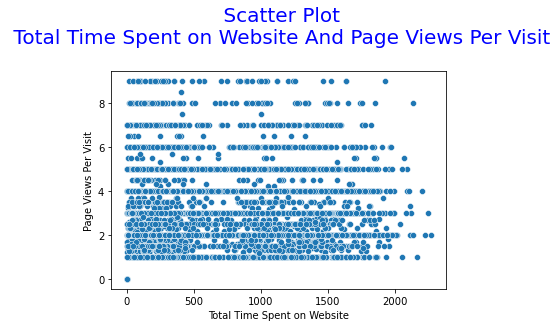

In [173]:
plt.title(" Scatter Plot\n Total Time Spent on Website And Page Views Per Visit\n",fontdict = {'fontsize':20 ,'fontweight': 5 , 'color': 'blue'})

sns.scatterplot(leads['Total Time Spent on Website'],leads['Page Views Per Visit'])
plt.show()

## Multivariate Analysis

In [174]:
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.044338,0.352502,-0.006128
TotalVisits,0.044338,1.000000,0.351449,0.721126
Total Time Spent on Website,0.352502,0.351449,1.000000,0.350523
Page Views Per Visit,-0.006128,0.721126,0.350523,1.000000


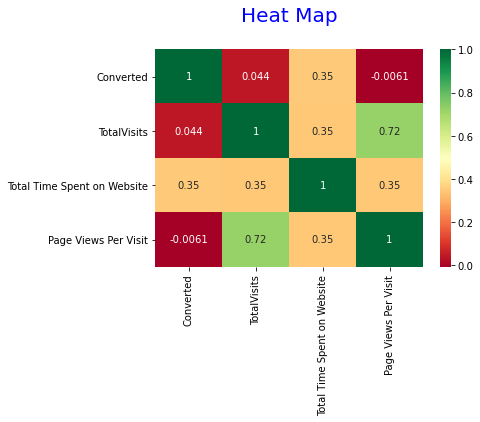

In [175]:
plt.title("Heat Map\n",fontdict = {'fontsize':20 ,'fontweight': 5 , 'color': 'blue'})
sns.heatmap(leads.corr(), cmap="RdYlGn", annot=True)
plt.show()


# Data Preparation

### Converting some binary yes/no to 1/0

In [176]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [177]:

leads['Do Not Email'] = leads['Do Not Email'].map({'Yes': 1, 'No': 0})
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [178]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


# Dummy  Variable Creation

In [179]:
leads.columns[leads.dtypes==object]

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [180]:
#For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [181]:
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity']],drop_first= True)

In [182]:
# Adding the results to the master dataframe
leads= pd.concat([leads, dummy], axis=1)

In [183]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,...,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,...,0,0,0,1,0,0,0,0,0,0


In [184]:
# Dropping the repeated variables

In [185]:
leads=leads.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],axis =1)

In [186]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [187]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8953 non-null   int64  
 1   Converted                                             8953 non-null   int64  
 2   TotalVisits                                           8953 non-null   float64
 3   Total Time Spent on Website                           8953 non-null   int64  
 4   Page Views Per Visit                                  8953 non-null   float64
 5   A free copy of Mastering The Interview                8953 non-null   int64  
 6   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 8   Lead Origin_Lead Import                               8953

# Test-Train Split

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
# X and y variable

In [190]:
X = leads.drop(['Converted'],axis=1 )
y = leads['Converted']

In [191]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [192]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# Splitting The Data Into Train and Test

In [193]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [194]:
X_train.shape

(6267, 40)

In [195]:
X_test.shape

(2686, 40)

In [196]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   A free copy of Mastering The Interview                6267 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 7   Lead Origin_Lead Import                               6267 non-null   uint8  
 8   Lead Source_Google                                    6

# Feature Scaling

In [197]:
from sklearn.preprocessing import MinMaxScaler

## Train data

In [198]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [199]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
9196,0,0.294118,0.655810,0.555556,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4696,0,0.176471,0.201144,0.333333,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3274,0,0.235294,0.055458,0.222222,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2164,0,0.117647,0.172975,0.222222,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1667,0,0.235294,0.513644,0.147778,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [200]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Do Not Email,6267.0,0.075475,0.264177,0.0,0.000000,0.000000,0.000000,1.0
TotalVisits,6267.0,0.181633,0.168187,0.0,0.058824,0.176471,0.235294,1.0
Total Time Spent on Website,6267.0,0.210265,0.241100,0.0,0.000440,0.102993,0.403169,1.0
Page Views Per Visit,6267.0,0.249155,0.210483,0.0,0.111111,0.222222,0.333333,1.0
A free copy of Mastering The Interview,6267.0,0.308122,0.461754,0.0,0.000000,0.000000,1.000000,1.0
Lead Origin_Landing Page Submission,6267.0,0.528961,0.499200,0.0,0.000000,1.000000,1.000000,1.0
Lead Origin_Lead Add Form,6267.0,0.069411,0.254172,0.0,0.000000,0.000000,0.000000,1.0
Lead Origin_Lead Import,6267.0,0.003510,0.059150,0.0,0.000000,0.000000,0.000000,1.0
Lead Source_Google,6267.0,0.316419,0.465116,0.0,0.000000,0.000000,1.000000,1.0
Lead Source_Olark Chat,6267.0,0.198979,0.399264,0.0,0.000000,0.000000,0.000000,1.0


# Logistic Regression Model Building 

In [201]:
from  sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 

In [202]:
# Feature selection with RFE

In [203]:
from sklearn.feature_selection import RFE

In [204]:
# Running RFE with 15 variables 

In [205]:
rfe = RFE(logreg,15)
rfe =rfe.fit(X_train,y_train)

In [206]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False, False, False])

In [207]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 25),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 5),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 23),
 ('Last Activi

In [208]:
# Select all RFE supported columns

In [209]:
col = X_train.columns[rfe.support_]

In [210]:
col.shape

(15,)

In [211]:
col.unique()

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [212]:
# Columns not supported by RFE 

In [213]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Other', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

# Model Building Using Stats Model 

In [214]:
import statsmodels.api as sm

In [215]:
# MODEL-1

In [216]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.6
Date:                Sun, 16 Oct 2022   Deviance:                       5221.3
Time:                        21:43:59   Pearson chi2:                 6.46e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7914      0.083     -9.572      0.000      -0.953      -0.629
Do Not Email                                            -1.7390      0.176     -9.860      0.000      -2.085      -1.393
Total Time Spent on Website                              4.5282      0.166     27.304      0.000       4.203       4.853
Lead Origin_Lead Add Form                                4.3150      0.245     17.596      0.000       3.834       4.796
Lead Origin_Lead Import                                  1.4881      0.485      3.071      0.002       0.538       2.438
Lead Source_Olark Chat                                   1.1894      0.103     11.599      0.000       0.988       1.390
Lead Source_Welingak Website                             2.3466      1.041      2.255      0.024       0.307       4.386
Last Activity_Olark Chat Conversation                   -1.2639      0.193     -6.545      0.000      -1.642      -0.885
Last Activity_Others                                     2.0237      0.600      3.373      0.001       0.848       3.200
What is your current occupation_Housewife               23.1450   1.79e+04      0.001      0.999   -3.51e+04    3.52e+04
What is your current occupation_Working Professional     2.6576      0.196     13.556      0.000       2.273       3.042
Last Notable Activity_Email Link Clicked                -2.0080      0.267     -7.509      0.000      -2.532      -1.484
Last Notable Activity_Email Opened                      -1.4317      0.088    -16.265      0.000      -1.604      -1.259
Last Notable Activity_Modified                          -1.8613      0.096    -19.292      0.000      -2.050      -1.672
Last Notable Activity_Olark Chat Conversation           -2.1485      0.424     -5.063      0.000      -2.980      -1.317
Last Notable Activity_Page Visited on Website           -1.7715      0.217     -8.178      0.000      -2.196      -1.347
========================================================================================================================
"""

In [217]:
# VIF

In [218]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [219]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs


In [220]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.92
12,Last Notable Activity_Modified,1.75
4,Lead Source_Olark Chat,1.56
1,Total Time Spent on Website,1.53
2,Lead Origin_Lead Add Form,1.45
11,Last Notable Activity_Email Opened,1.37
13,Last Notable Activity_Olark Chat Conversation,1.33
5,Lead Source_Welingak Website,1.32
9,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.10


In [221]:
# Dropping 'What is your current occupation_Working Profession' having the highest p-value and it is >o.05 

In [222]:
col = col.drop(['What is your current occupation_Housewife'],1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [223]:
col.shape

(14,)

In [224]:
# MODEL- 2

In [225]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.1
Date:                Sun, 16 Oct 2022   Deviance:                       5230.1
Time:                        21:43:59   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7893      0.083     -9.551      0.000      -0.951      -0.627
Do Not Email                                            -1.7408      0.176     -9.872      0.000      -2.086      -1.395
Total Time Spent on Website                              4.5231      0.166     27.302      0.000       4.198       4.848
Lead Origin_Lead Add Form                                4.3238      0.245     17.649      0.000       3.844       4.804
Lead Origin_Lead Import                                  1.4818      0.484      3.059      0.002       0.532       2.431
Lead Source_Olark Chat                                   1.1848      0.102     11.564      0.000       0.984       1.386
Lead Source_Welingak Website                             2.3327      1.040      2.242      0.025       0.293       4.372
Last Activity_Olark Chat Conversation                   -1.2666      0.193     -6.561      0.000      -1.645      -0.888
Last Activity_Others                                     2.0206      0.600      3.369      0.001       0.845       3.196
What is your current occupation_Working Professional     2.6539      0.196     13.539      0.000       2.270       3.038
Last Notable Activity_Email Link Clicked                -2.0078      0.267     -7.507      0.000      -2.532      -1.484
Last Notable Activity_Email Opened                      -1.4271      0.088    -16.225      0.000      -1.600      -1.255
Last Notable Activity_Modified                          -1.8568      0.096    -19.265      0.000      -2.046      -1.668
Last Notable Activity_Olark Chat Conversation           -2.1434      0.424     -5.053      0.000      -2.975      -1.312
Last Notable Activity_Page Visited on Website           -1.7714      0.217     -8.179      0.000      -2.196      -1.347
========================================================================================================================
"""

In [226]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.92
11,Last Notable Activity_Modified,1.74
4,Lead Source_Olark Chat,1.56
1,Total Time Spent on Website,1.53
2,Lead Origin_Lead Add Form,1.45
10,Last Notable Activity_Email Opened,1.37
12,Last Notable Activity_Olark Chat Conversation,1.33
5,Lead Source_Welingak Website,1.32
8,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.10


In [227]:
# Lead Source_Welingak Website

In [228]:
col = col.drop(['Lead Source_Welingak Website'],1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [229]:
col.shape

(13,)

In [230]:
#Model-3

In [231]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.9
Date:                Sun, 16 Oct 2022   Deviance:                       5239.9
Time:                        21:43:59   Pearson chi2:                 6.62e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7889      0.083     -9.550      0.000      -0.951      -0.627
Do Not Email                                            -1.7380      0.176     -9.881      0.000      -2.083      -1.393
Total Time Spent on Website                              4.5216      0.166     27.304      0.000       4.197       4.846
Lead Origin_Lead Add Form                                4.6634      0.237     19.693      0.000       4.199       5.128
Lead Origin_Lead Import                                  1.4814      0.484      3.058      0.002       0.532       2.431
Lead Source_Olark Chat                                   1.1833      0.102     11.553      0.000       0.983       1.384
Last Activity_Olark Chat Conversation                   -1.2662      0.193     -6.560      0.000      -1.644      -0.888
Last Activity_Others                                     2.0160      0.600      3.357      0.001       0.839       3.193
What is your current occupation_Working Professional     2.6466      0.196     13.484      0.000       2.262       3.031
Last Notable Activity_Email Link Clicked                -2.0181      0.269     -7.507      0.000      -2.545      -1.491
Last Notable Activity_Email Opened                      -1.4268      0.088    -16.227      0.000      -1.599      -1.254
Last Notable Activity_Modified                          -1.8562      0.096    -19.270      0.000      -2.045      -1.667
Last Notable Activity_Olark Chat Conversation           -2.1035      0.417     -5.047      0.000      -2.920      -1.287
Last Notable Activity_Page Visited on Website           -1.7728      0.217     -8.180      0.000      -2.198      -1.348
========================================================================================================================
"""

In [232]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Olark Chat Conversation,1.92
10,Last Notable Activity_Modified,1.74
4,Lead Source_Olark Chat,1.56
1,Total Time Spent on Website,1.53
9,Last Notable Activity_Email Opened,1.37
11,Last Notable Activity_Olark Chat Conversation,1.33
7,What is your current occupation_Working Profes...,1.14
2,Lead Origin_Lead Add Form,1.11
0,Do Not Email,1.10
12,Last Notable Activity_Page Visited on Website,1.04


# Getting the predicted values on the train set

In [234]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


9196    0.898106
4696    0.530103
3274    0.368613
2164    0.041921
1667    0.526655
7024    0.262609
8018    0.048556
778     0.082847
6942    0.061343
4440    0.164287
dtype: float64

In [235]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.89810589, 0.53010309, 0.36861289, 0.04192081, 0.52665523,
       0.26260872, 0.04855574, 0.0828472 , 0.06134297, 0.16428651])

In [236]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

In [237]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,1,0.898106,9196
1,0,0.530103,4696
2,0,0.368613,3274
3,0,0.041921,2164
4,1,0.526655,1667


In [238]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [239]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.898106,9196,1
1,0,0.530103,4696,1
2,0,0.368613,3274,0
3,0,0.041921,2164,0
4,1,0.526655,1667,1


## Confusion Matrix 

In [240]:
from sklearn import metrics

In [241]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)


[[3443  439]
 [ 741 1644]]


In [242]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8117121429711186


# Metrics Beyond Simply Accuracy

In [243]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [244]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6893081761006289

In [245]:
# Let us calculate specificity
TN / float(TN+FP)

0.886913961875322

In [246]:
#Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.113086038124678


In [247]:
# positive predictive value 
print (TP / float(TP+FP))

0.7892462794047047


In [248]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8228967495219885


## Plotting the ROC Curve

In [249]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [250]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

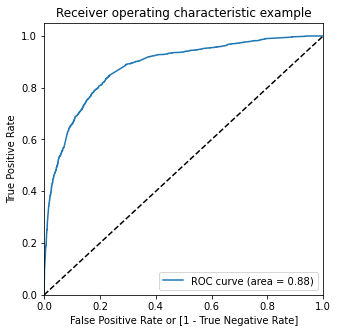

In [251]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Finding Optimal Cutoff Point

In [252]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.898106,9196,1,1,1,1,1,1,1,1,1,1,0
1,0,0.530103,4696,1,1,1,1,1,1,1,0,0,0,0
2,0,0.368613,3274,0,1,1,1,1,0,0,0,0,0,0
3,0,0.041921,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.526655,1667,1,1,1,1,1,1,1,0,0,0,0


In [253]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.578427  0.967715  0.339258
0.2   0.2  0.757460  0.901468  0.668985
0.3   0.3  0.798468  0.836897  0.774858
0.4   0.4  0.808840  0.765199  0.835652
0.5   0.5  0.811712  0.689308  0.886914
0.6   0.6  0.792245  0.568553  0.929675
0.7   0.7  0.780597  0.499790  0.953117
0.8   0.8  0.763045  0.421803  0.972694
0.9   0.9  0.716451  0.273375  0.988666


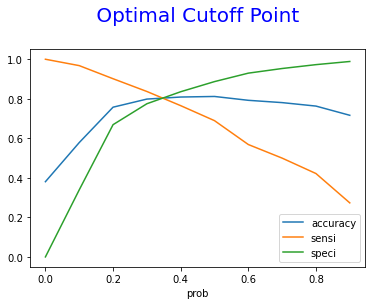

In [254]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title(" Optimal Cutoff Point \n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
plt.show()


In [255]:
#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.898106,9196,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.530103,4696,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.368613,3274,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.041921,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.526655,1667,1,1,1,1,1,1,1,0,0,0,0,1


In [256]:
# Let's check the overall accuracy.
100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)


80.88399553215254

In [257]:
# Confusion matric -2

In [258]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2


array([[3244,  638],
       [ 560, 1825]])

In [259]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [260]:
# Let's see the sensitivity of our logistic regression model
100*TP / float(TP+FN)


76.51991614255765

In [261]:
# Let us calculate specificity
100*TN / float(TN+FP)


83.5651725914477

In [262]:
#Calculate False Postive Rate - predicting conversion when customer does not have convert
100*FP/ float(TN+FP)

16.43482740855229

In [263]:
# Positive predictive value 
100*TP / float(TP+FP)

74.09663012586277

In [264]:
# Negative predictive value
100*TN / float(TN+ FN)

85.27865404837014

# Precision and Recall

In [265]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion


array([[3244,  638],
       [ 560, 1825]])

In [266]:
## Precision
TP / TP + FP


639.0

In [267]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7409663012586277

In [268]:
##### Recall
TP / TP + FN

561.0

In [269]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7651991614255765

In [270]:
#Using sklearn utilities for the same

In [271]:
from sklearn.metrics import precision_score, recall_score

In [272]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7409663012586277

In [273]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7651991614255765

In [274]:
# Precision and recall tradeoff

In [275]:
from sklearn.metrics import precision_recall_curve

In [276]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

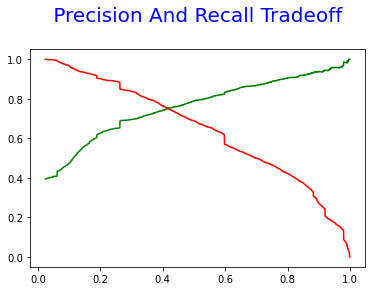

In [277]:
plt.figure(figsize=(6,4))
plt.title(" Precision And Recall Tradeoff \n",fontdict = {'fontsize':20,'fontweight':5,'color':'blue'})
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


# Making Predictions On The Test Set

In [278]:
# Scaling test set

In [279]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [280]:
X_test = X_test[col]
X_test.head()


,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
7681,0,0.145327,0,0,0,0,0,0,0,0,0,0,0
984,0,0.085514,0,0,0,0,0,0,0,0,1,0,0
8135,1,0.426636,0,0,0,0,0,0,0,0,0,0,0
6915,0,0.065888,0,0,0,0,0,0,0,1,0,0,0
2712,0,0.117757,0,0,0,0,0,0,0,1,0,0,0


In [281]:
X_test_sm = sm.add_constant(X_test)

In [282]:
y_test_pred = res.predict(X_test_sm)

In [283]:
y_test_pred[:10]

7681    0.467092
984     0.094625
8135    0.354830
6915    0.128103
2712    0.156658
244     0.651569
4698    0.078686
8287    0.061343
6791    0.387499
8970    0.122956
dtype: float64

In [284]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)


In [285]:
# Let's see the head
y_pred_1.head()


,0
7681,0.467092
984,0.094625
8135,0.354830
6915,0.128103
2712,0.156658


In [286]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [287]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index


In [288]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [289]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [290]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.467092
1,0,984,0.094625
2,0,8135,0.354830
3,0,6915,0.128103
4,1,2712,0.156658


In [291]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [292]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.467092
1,0,984,0.094625
2,0,8135,0.354830
3,0,6915,0.128103
4,1,2712,0.156658


In [293]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))


In [294]:
# Let's see the head of y_pred_final
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.467092,47
1,984,0,0.094625,9
2,8135,0,0.354830,35
3,6915,0,0.128103,13
4,2712,1,0.156658,16


In [295]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [296]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.467092,47,1
1,984,0,0.094625,9,0
2,8135,0,0.354830,35,0
3,6915,0,0.128103,13,0
4,2712,1,0.156658,16,0


In [297]:
# Hot lead 

In [298]:
y_pred_final[y_pred_final['Lead_Score']>80]

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
12,1026,1,0.952197,95,1
13,5167,1,0.851781,85,1
18,8650,1,0.943438,94,1
21,1594,1,0.941273,94,1
25,3039,0,0.806178,81,1
...,...,...,...,...,...
2636,6823,1,0.951293,95,1
2640,6557,1,0.851247,85,1
2655,3034,1,0.990558,99,1
2666,5535,0,0.979658,98,1


In [299]:
# Let's check the overall accuracy.
100*metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)


80.67758749069249

In [300]:
# Confusion matrix

In [301]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2


array([[1382,  294],
       [ 225,  785]])

In [302]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [303]:
# Let's see the sensitivity of our logistic regression model
100*TP / float(TP+FN)


77.72277227722772

In [304]:
# Let us calculate specificity
100*TN / float(TN+FP)


82.4582338902148

In [305]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7275254865616312

In [306]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7772277227722773

# Observation: